In [13]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/MLDM /Course Work-2/Insurance cross sell.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [14]:
df = data.drop(['id',], axis=1)
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [15]:
df=pd.get_dummies(df,drop_first=True)

In [16]:
df=df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year']=df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years']=df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes']=df['Vehicle_Damage_Yes'].astype('int')

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(['Response'],axis=1)
y = df['Response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 101) 

SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(X_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 35135
Before OverSampling, counts of label '0': 250696 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (501392, 11)
After OverSampling, the shape of train_Y: (501392, 11) 

After OverSampling, counts of label '1': 250696
After OverSampling, counts of label '0': 250696


Hyperparameter tuning

In [19]:
import numpy as np
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
params = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

**As the dataset was very huge, let's consider the sample data.**

Logistic

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res[:10000], y_train_res[:10000])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.875500 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Decision Tree

In [ ]:
DTC = DecisionTreeClassifier()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['max_depth']= [3,4,5,6,7]
space['criterion'] = ['gini', 'entropy']
space['splitter'] = ['best','random']
search = GridSearchCV(DTC, space, scoring='recall', n_jobs=-1, cv=cv)
result = search.fit(X_train_res[:10000], y_train_res[:10000])
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.005888 using {'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}


Random Forest

In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res[:10000], y_train_res[:10000])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.865667 using {'max_features': 'log2', 'n_estimators': 1000}


KNN

In [ ]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res[:10000], y_train_res[:10000])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.875467 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


Gradient Boosted

In [ ]:
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res[:10000], y_train_res[:10000])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.875500 using {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}


SVC

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res[:10000], y_train_res[:10000])
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Naive Bayes

In [ ]:
nb = GaussianNB()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['var_smoothing'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14]
search = GridSearchCV(nb, space, scoring='recall', n_jobs=-1, cv=cv)
result = search.fit(X_train_res[:10000], y_train_res[:10000])
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9393513936130574
Best Hyperparameters: {'var_smoothing': 1e-14}


**Area under ROC curve**

In [29]:
lr = LogisticRegression()
knn=KNeighborsClassifier()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
sv=SVC()
rf=RandomForestClassifier()
gb = F=GradientBoostingClassifier()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic

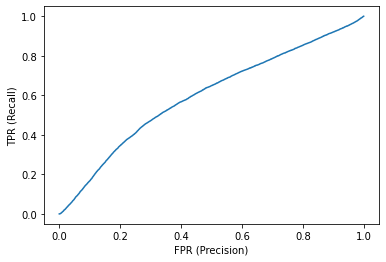

Area under curve (AUC):  0.5980687223098207


In [34]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
lr.fit(X_train,y_train)
y_score = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

Decision Tree

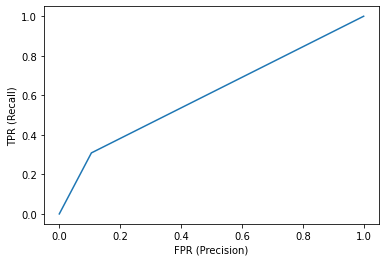

Area under curve (AUC):  0.6015871823261558


In [35]:
from sklearn.metrics import roc_curve,auc
dtc.fit(X_train,y_train)
y_score = dtc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

Random Forest

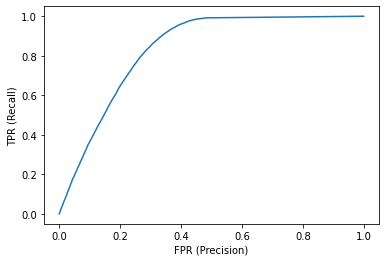

Area under curve (AUC):  0.8332085426284425


In [36]:
from sklearn.metrics import roc_curve,auc
rf.fit(X_train,y_train)
y_score = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

KNN

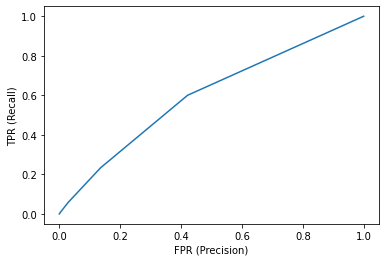

Area under curve (AUC):  0.5983599871488435


In [37]:
from sklearn.metrics import roc_curve,auc
knn.fit(X_train,y_train)
y_score = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

Gradient Boosted

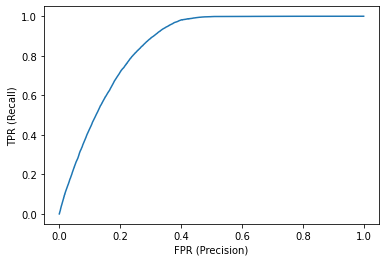

Area under curve (AUC):  0.8556900832829972


In [38]:
from sklearn.metrics import roc_curve,auc
gb.fit(X_train,y_train)
y_score = gb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

SVC

In [ ]:
from sklearn.metrics import roc_curve,auc
sv.fit(X_train,y_train)
y_score = sv.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

Naive Bayes

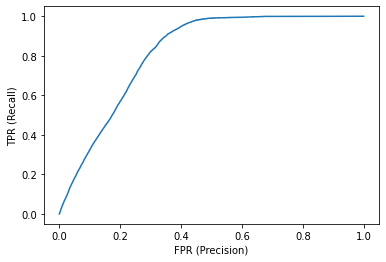

Area under curve (AUC):  0.8177374455898516


In [39]:
from sklearn.metrics import roc_curve,auc
nb.fit(X_train,y_train)
y_score = nb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))